In [3]:
# get all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

In [49]:
toyota = pd.read_csv("Toyota_data.csv") # read data

In [50]:
toyota.head()

,Year,Make,Model,Trim,Body,Cab Type,Truck Bed Size,Exterior Condition,Interior Condition,Drive Type,...,Fuel Type,Number of Doors,Number of Seat Belts,Mileage,VIN,Title Type,Exterior Color,Interior Color,Price,Views
0,2004,Toyota,Tacoma,V6,Truck,Extended Cab,Standard Shortbed,Fair,Fair,4-Wheel Drive,...,Gasoline,2,5,259464,5TEWN72N24Z453197,Clean Title,Black,Gray,6000,421
1,2016,Toyota,Prius,Not Specified,Coupe,Not Specified,Not Specified,Very Good,Very Good,Not Specified,...,Gasoline,4,Not Specified,200420,JTDKBRFU3G3014324,Clean Title,White,Gray,9260,108
2,1989,Toyota,Pickup,Base,Truck,Regular Cab,Not Specified,Good,Good,4-Wheel Drive,...,Gasoline,2,3,205074,JT4RN01P2K4010738,Clean Title,Black,Gray,7000,750
3,2013,Toyota,RAV4 EV,Not Specified,SUV,Not Specified,Not Specified,Very Good,Very Good,Not Specified,...,Not Specified,Not Specified,Not Specified,57026,2T3YL4DV9DW002127,Clean Title,Blue,Gray,12900,236
4,2007,Toyota,4Runner,Limited,Sport Utility,Not Specified,Not Specified,Very Good,Very Good,4-Wheel Drive,...,Gasoline,4,5,205000,JTEBU17R278100678,Clean Title,Black,Gray,12000,0


In [69]:
# printing top views with grouping the Model to see what model has good views for dealership
views_and_price = toyota[['Views', 'Model', 'Price']].nlargest(50, 'Views').groupby('Model').agg({'Views': 'sum', 'Price': 'mean'})
views_and_price.columns = ['Total Views', 'Average Price']
views_and_price

,Total Views,Average Price
Model,,
4Runner,14904,10114.000000
Camry,1989,4750.000000
Celica,2082,2700.000000
Corolla,4442,9498.000000
FJ Cruiser,940,27000.000000
Land Cruiser,14352,17580.000000
MR2,3840,6800.000000
Pickup,17416,2550.000000
Prius,892,7400.000000


In [6]:
len(toyota) # checking the length 

442

In [7]:
toyota.dtypes

Year                     int64
Make                    object
Model                   object
Trim                    object
Body                    object
Cab Type                object
Truck Bed Size          object
Exterior Condition      object
Interior Condition      object
Drive Type              object
Dealer License          object
Stock Number            object
Transmission            object
Liters                  object
Cylinders               object
Fuel Type               object
Number of Doors         object
Number of Seat Belts    object
Mileage                  int64
VIN                     object
Title Type              object
Exterior Color          object
Interior Color          object
Price                    int64
Views                    int64
dtype: object

In [8]:
toyota = toyota.replace('Not Specified', np.nan) # dropping the Not Specified for missing data into NaNs
toyota = toyota.replace('not found', np.nan) # dropping the not found for missing data into NaNs

In [9]:
# replacing the L with gap so that Liters can be numeric
toyota['Liters'] = toyota['Liters'].astype(str).str.replace('L', '').astype(float) 

In [10]:
toyota['Liters']

0      3.4
1      NaN
2      2.4
3      NaN
4      4.0
      ... 
437    NaN
438    NaN
439    1.4
440    2.5
441    2.7
Name: Liters, Length: 442, dtype: float64

In [11]:
# changing the datatypes fom object to numeric
toyota['Year'] = pd.to_numeric(toyota['Year'], errors='coerce')
toyota['Liters'] = pd.to_numeric(toyota['Liters'], errors='coerce')
toyota['Cylinders'] = pd.to_numeric(toyota['Cylinders'], errors='coerce')
toyota['Number of Doors'] = pd.to_numeric(toyota['Number of Doors'], errors='coerce')
toyota['Number of Seat Belts'] = pd.to_numeric(toyota['Number of Seat Belts'], errors='coerce')
toyota['Mileage'] = pd.to_numeric(toyota['Mileage'], errors='coerce')
toyota['Price'] = pd.to_numeric(toyota['Price'], errors='coerce')
toyota['Views'] = pd.to_numeric(toyota['Views'], errors='coerce')

In [12]:
toyota.dtypes # test for datatypes again

Year                      int64
Make                     object
Model                    object
Trim                     object
Body                     object
Cab Type                 object
Truck Bed Size           object
Exterior Condition       object
Interior Condition       object
Drive Type               object
Dealer License           object
Stock Number            float64
Transmission             object
Liters                  float64
Cylinders               float64
Fuel Type                object
Number of Doors         float64
Number of Seat Belts    float64
Mileage                   int64
VIN                      object
Title Type               object
Exterior Color           object
Interior Color           object
Price                     int64
Views                     int64
dtype: object

In [13]:
# looking for NaN
(toyota.isnull().sum()/len(toyota))*100

Year                      0.000000
Make                      0.000000
Model                     0.000000
Trim                     14.479638
Body                      0.000000
Cab Type                 88.235294
Truck Bed Size           89.592760
Exterior Condition       13.122172
Interior Condition       12.895928
Drive Type               10.859729
Dealer License           99.773756
Stock Number            100.000000
Transmission             21.040724
Liters                   34.615385
Cylinders                 8.144796
Fuel Type                13.574661
Number of Doors           9.728507
Number of Seat Belts     66.968326
Mileage                   0.000000
VIN                       0.000000
Title Type                1.583710
Exterior Color            8.823529
Interior Color           15.610860
Price                     0.000000
Views                     0.000000
dtype: float64

In [14]:
toyota = toyota.dropna(subset=['Year', 'Mileage', 'Price', 'Views']) # if any NaN after tranformations

In [15]:
#dropping the Dealer License and Stock Number 
toyota = toyota.drop(columns=['Dealer License', 'Stock Number','VIN'])

In [16]:
# filling with median for others 
new_cols = ['Cylinders', 'Number of Doors', 'Number of Seat Belts']
toyota[new_cols] = toyota[new_cols].apply(lambda x: x.fillna(x.median()), axis=0)

In [17]:
# dealing with null in object columns 
object_cols = ['Trim', 'Cab Type', 'Truck Bed Size', 'Exterior Condition', 'Interior Condition', 
               'Drive Type', 'Transmission', 'Liters', 
               'Fuel Type', 'Title Type', 'Exterior Color', 'Interior Color']
toyota[object_cols] = toyota[object_cols].fillna('Unknown')

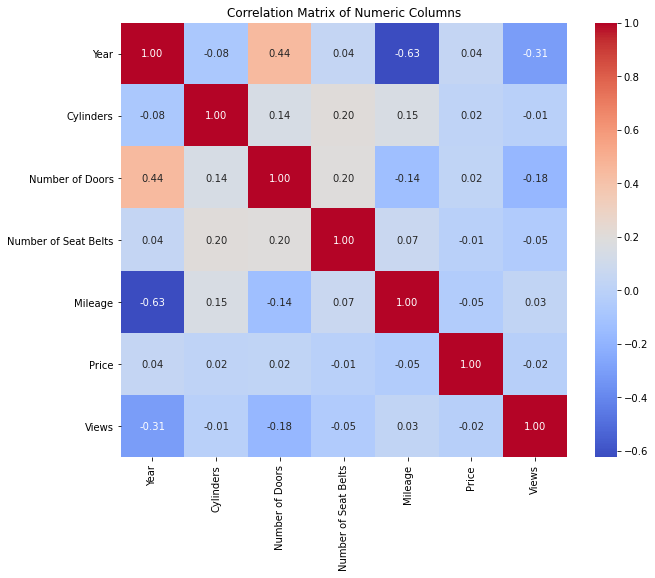

In [18]:
# correlation plot 
correlation_matrix = toyota.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [19]:
len(toyota.columns)

22

In [20]:
len(toyota)

442

In [21]:
# double checking nulls values now 
(toyota.isnull().sum()/len(toyota))*100

Year                    0.0
Make                    0.0
Model                   0.0
Trim                    0.0
Body                    0.0
Cab Type                0.0
Truck Bed Size          0.0
Exterior Condition      0.0
Interior Condition      0.0
Drive Type              0.0
Transmission            0.0
Liters                  0.0
Cylinders               0.0
Fuel Type               0.0
Number of Doors         0.0
Number of Seat Belts    0.0
Mileage                 0.0
Title Type              0.0
Exterior Color          0.0
Interior Color          0.0
Price                   0.0
Views                   0.0
dtype: float64

Text(0.5, 1.0, 'Distribution of Year')

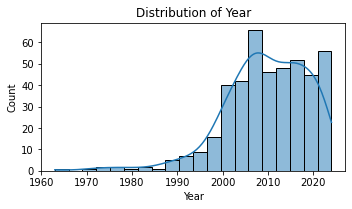

In [22]:
# Visuals 
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(toyota['Year'], bins=20, kde=True)
plt.title('Distribution of Year')

Text(0.5, 1.0, 'Distribution of Mileage')

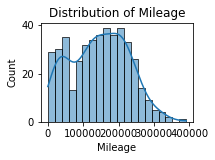

In [23]:
plt.subplot(2, 2, 2)
sns.histplot(toyota['Mileage'], bins=20, kde=True)
plt.title('Distribution of Mileage')

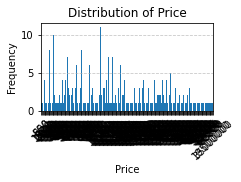

In [24]:
# Bar chart for price distribution
plt.subplot(2, 2, 3)
toyota['Price'].value_counts().sort_index().plot(kind='bar', width=0.8)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

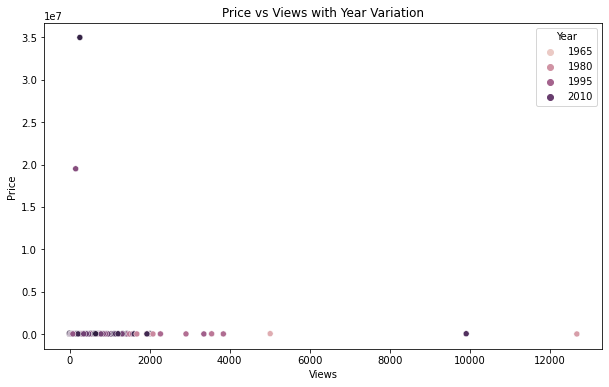

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Views', y='Price', data=toyota, hue='Year')
plt.title('Price vs Views with Year Variation')
plt.xlabel('Views')
plt.ylabel('Price')
plt.show()

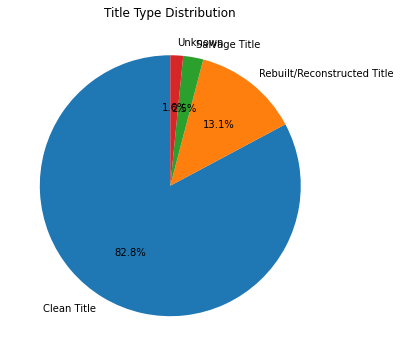

In [26]:
plt.figure(figsize=(8, 6))
toyota['Title Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Title Type Distribution')
plt.ylabel('')
plt.show()

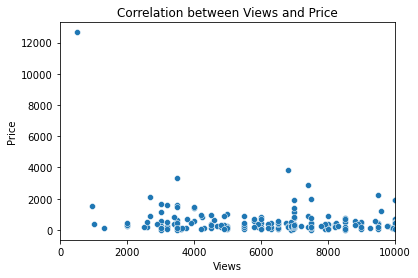

In [27]:
sns.scatterplot(y='Views', x='Price', data=toyota)
plt.title('Correlation between Views and Price')
plt.xlabel('Views')
plt.ylabel('Price')
plt.xlim(0, 10000)
plt.show()

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# Selecting only the categorical columns
categorical_cols = toyota.select_dtypes(include='object').columns.tolist()

# Performing one-hot encoding for categorical variables
toyota_encoded = pd.get_dummies(toyota, columns=categorical_cols, drop_first=True)

# Displaying the first few rows of the encoded DataFrame
#print(toyota_encoded.head())

# Separate features and target variable
X = toyota_encoded.drop(['Views'], axis=1)  # Features
y = toyota_encoded['Views']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create LassoCV model
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=5)

# Fit the model
lasso_cv.fit(X_train_scaled, y_train)

/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89041.73104759678, tolerance: 24491.317671276593
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101934.95904178172, tolerance: 24491.317671276593
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 720674.7570794336, tolerance: 24491.317671276593
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/o

LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=5)

In [29]:
# Optimal alpha
optimal_alpha = lasso_cv.alpha_
print("Optimal alpha:", optimal_alpha)

# Cross-validation scores
cv_scores = cross_val_score(lasso_cv, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Fit Lasso regression model
lasso = Lasso(alpha=100)  # Set the regularization parameter alpha
lasso.fit(X_train_scaled, y_train)

# Display the coefficients of the Lasso model
lasso_coeffs = pd.Series(lasso.coef_, index=X.columns)
#print("Lasso coefficients:")
#print(lasso_coeffs)

/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724151.3398175817, tolerance: 8198.740304000003
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2012443.0402811002, tolerance: 8198.740304000003
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2516911.815273978, tolerance: 8198.740304000003
  model = cd_fast.enet_coordinate_descent_gram(


Optimal alpha: 10.0


/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 691357.8370232806, tolerance: 21778.591984
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1772667.8421665179, tolerance: 21778.591984
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2281275.1025182335, tolerance: 21778.591984
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/anaconda3/lib/

/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2177701.428097684, tolerance: 23732.570758222224
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2722695.1572281457, tolerance: 23732.570758222224
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 974492.2582381181, tolerance: 23518.817486222222
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/o

/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337277.3211766258, tolerance: 22389.25366415929
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 986192.6578824259, tolerance: 22389.25366415929
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 832058.0850505373, tolerance: 22389.25366415929
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/a

Cross-validation scores: [-0.23398391  0.1552895  -0.69120659  0.23872227  0.02290511]
Mean CV score: -0.10165472370795943


/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2713581.3043831624, tolerance: 22671.44238502203
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 537992.6384010203, tolerance: 20794.98966872247
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1093803.0238265358, tolerance: 20794.98966872247
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maanveemehrotra/opt

In [30]:
# Select features with non-zero coefficients
selected_features = lasso_coeffs[lasso_coeffs != 0].index.tolist()
print("\nSelected features:")
print(selected_features)


Selected features:
['Year', 'Model_Land Cruiser', 'Model_MR2', 'Interior Condition_Poor']


In [31]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = lasso.predict(X_test_scaled)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2038433.6579788176


In [32]:
from sklearn.ensemble import RandomForestRegressor

# Select only the selected features for training
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(min_samples_split= 5, random_state=42)

# Fit the Random Forest regressor on the selected features
rf_regressor.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test_selected)

# Calculate MSE for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)

Mean Squared Error (Random Forest): 1658867.449721191


In [33]:
import pandas as pd

# Convert NumPy array to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Use .loc method on DataFrame
rf_regressor.fit(X_train_scaled_df.loc[:, selected_features], y_train)


RandomForestRegressor(min_samples_split=5, random_state=42)

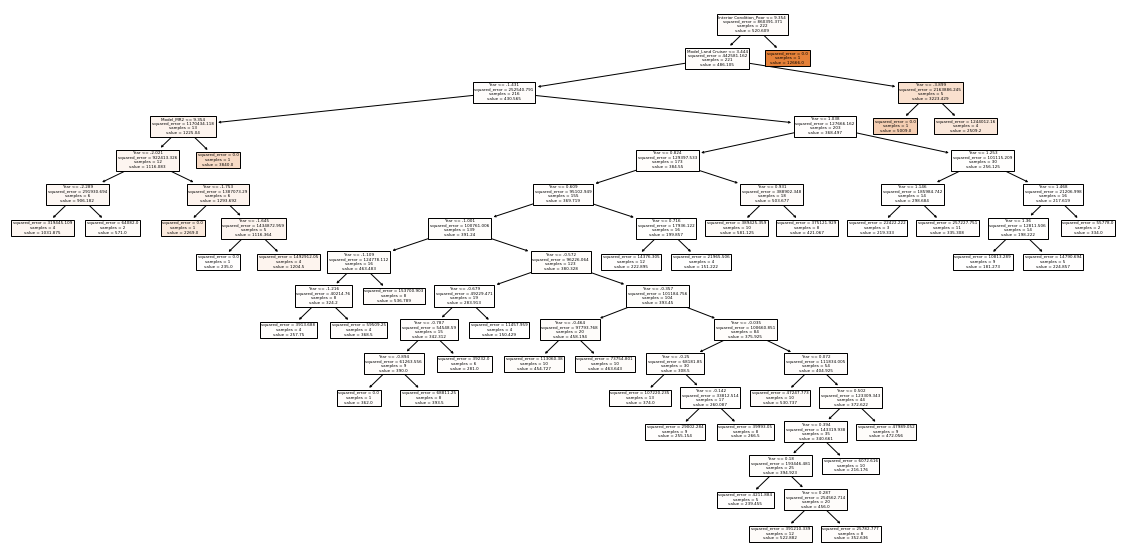

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract a single decision tree from the Random Forest
single_tree = rf_regressor.estimators_[0]

feature_name = X_test_selected.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=feature_name, class_names=['0', '1'])
plt.savefig('random_forest_tree.pdf')  # Save the tree as a PDF file
plt.show()

In [35]:
# get feature importance
feat_imp = rf_regressor.feature_importances_

# get feature names
feature_name = X_test_selected.columns

# create a dataframe showing the feature importance
impurity_df = pd.DataFrame({'feature_name':feature_name,'feature_importance':feat_imp})

# sort on feature importance
impurity_df = impurity_df.sort_values(by = 'feature_importance', ascending=False)
impurity_df

,feature_name,feature_importance
3,Interior Condition_Poor,0.441540
0,Year,0.403495
1,Model_Land Cruiser,0.094228
2,Model_MR2,0.060736


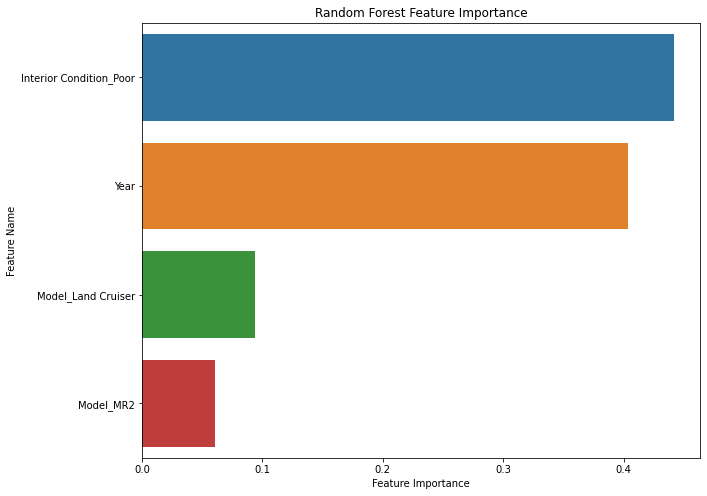

In [36]:
# darw the impurity importance
plt.figure(figsize=(10, 8))
sns.barplot(data=impurity_df, x='feature_importance', y='feature_name')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Feature Importance')
plt.show()

In [37]:
# Select the top features based on feature importance from MDI 
top_features = impurity_df.iloc[:4]['feature_name'].tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Initialize the Random Forest regressor
rf_regressor_top = RandomForestRegressor(min_samples_split=5, random_state=42)

# Fit the Random Forest regressor on the top features
rf_regressor_top.fit(X_train_top, y_train)

# Predict on the test set
y_pred_rf_top = rf_regressor_top.predict(X_test_top)

# Calculate MSE for the new Random Forest
mse_rf_top = mean_squared_error(y_test, y_pred_rf_top)
print("Mean Squared Error (Random Forest with Top Features):", mse_rf_top)

Mean Squared Error (Random Forest with Top Features): 1650008.7655414555


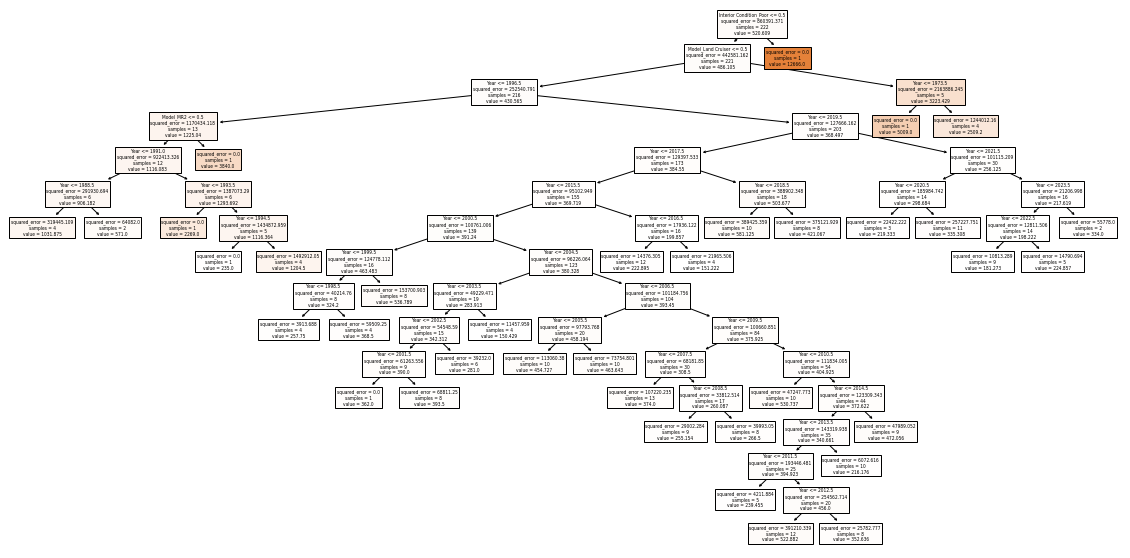

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract a single decision tree from the Random Forest with top features
single_tree_top = rf_regressor_top.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree_top, filled=True, feature_names=top_features, class_names=['0', '1'])
plt.savefig('random_forest_tree_top_features.pdf')  # Save the tree as a PDF file
plt.show()

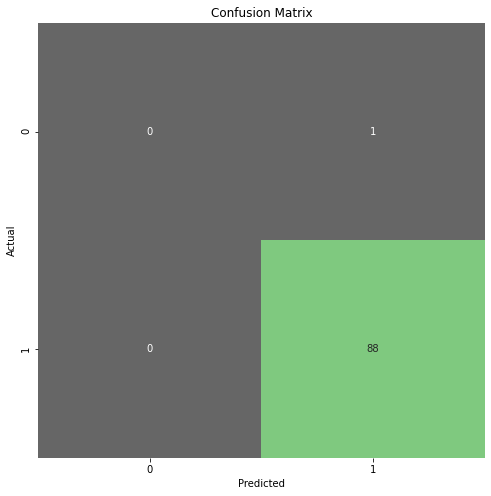

In [47]:
from sklearn.metrics import confusion_matrix

y_pred_rf = rf_regressor_top.predict(X_test_top)

# predicted and actual views to binary values so we can understand properly
y_pred_binary = (y_pred_rf > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

# Create matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Now plot the matrix 
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Accent_r", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()